# Diabetes Prediction

<a href= 'https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset' target=_blank>You can find detailed information about the data here.</a>

### Introduction



With this project, our goal is to develop a machine learning model to predict the diabetes status (positive or negative).

<a href='https://huggingface.co/spaces/ttugba/Diabetes_Prediction' target=_blank> Diabetes Prediction App </a>

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


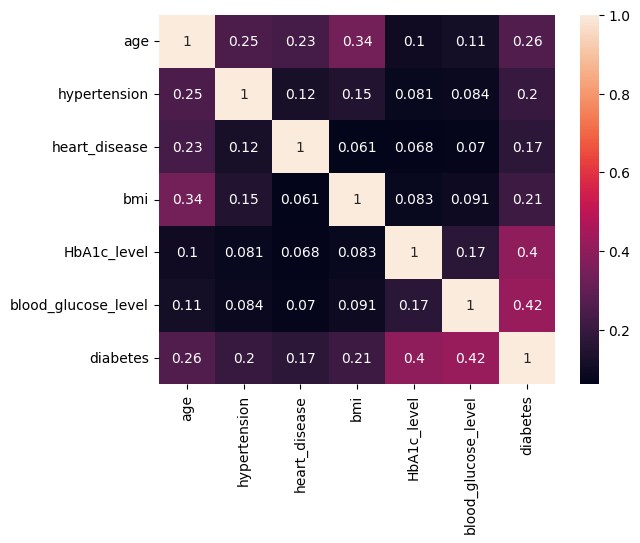

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

### Data Visualization

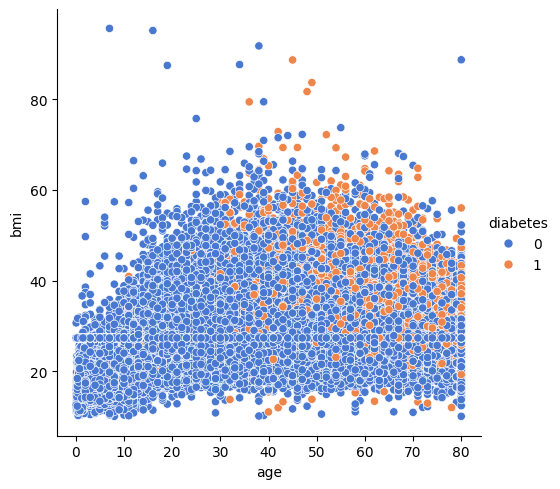

In [10]:
sns.relplot(x='age', y='bmi', hue='diabetes', palette='muted', data=df);

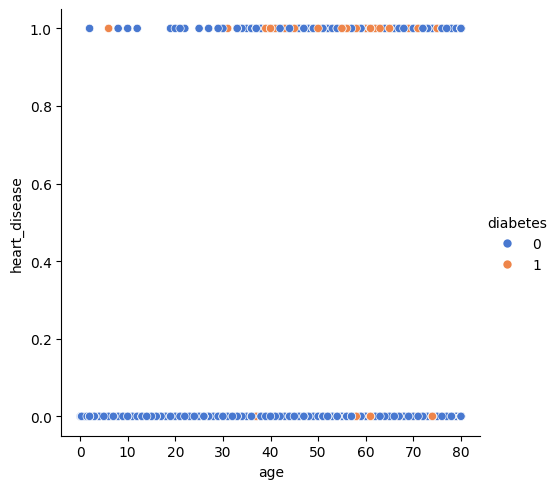

In [11]:
sns.relplot(x='age', y='heart_disease', hue='diabetes', palette='muted', data=df);

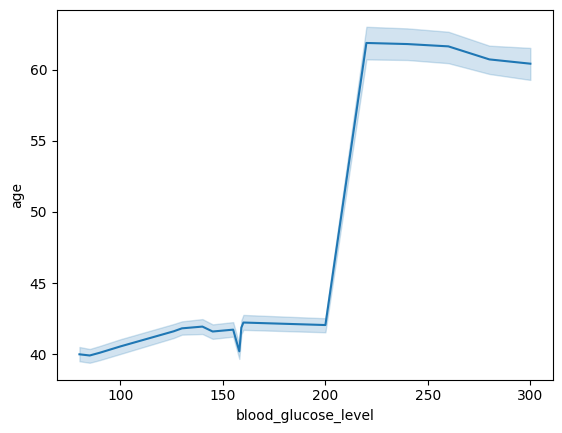

In [12]:
sns.lineplot(y='age',x='blood_glucose_level',data=df);

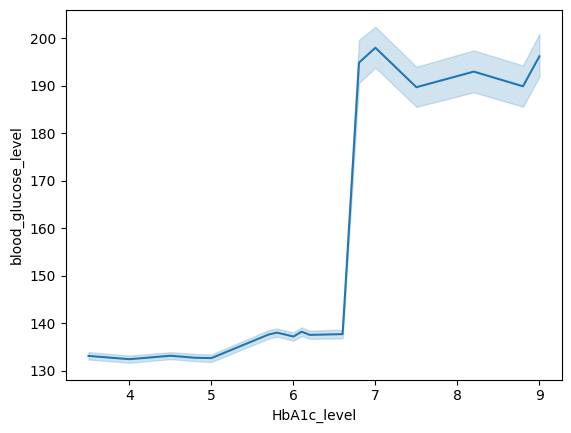

In [13]:
sns.lineplot(x='HbA1c_level',y='blood_glucose_level',data=df);

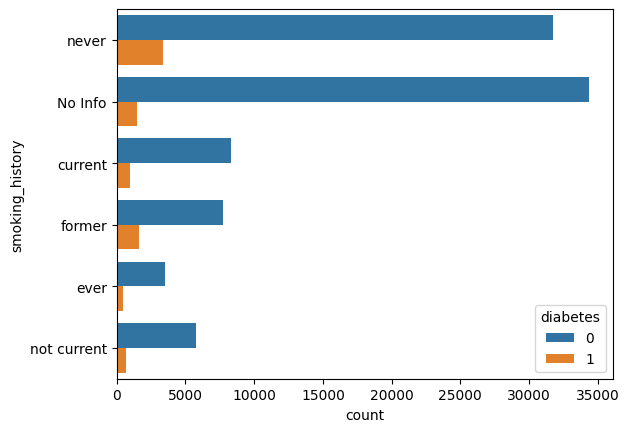

In [14]:
sns.countplot(y=df['smoking_history'],hue=df['diabetes']);

### Classification

In [15]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [16]:
g={'Male':0,'Female':1, 'Other':2}

In [17]:
df['gender']=df['gender'].map(g)

### Feature Engineering & Modeling

In [18]:
x=df.drop(['diabetes','smoking_history'],axis=1) 
y=df[['diabetes']]

In [19]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [20]:
l=LogisticRegression()
g=GaussianNB()
b=BernoulliNB()

In [21]:
l.fit(x,y)

LogisticRegression()

In [22]:
lpredict=l.predict(x_test)

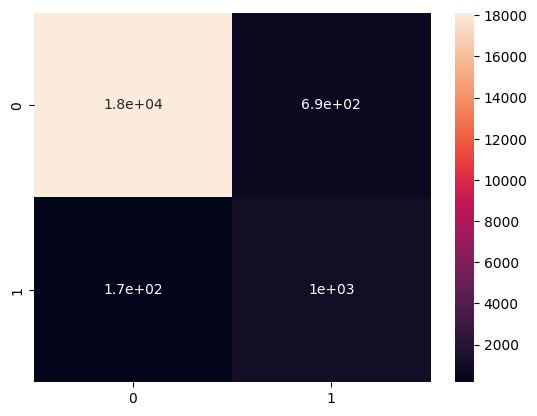

In [23]:
sns.heatmap(confusion_matrix(lpredict,y_test),annot=True);

In [24]:
print(classification_report(lpredict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18816
           1       0.59      0.86      0.70      1184

    accuracy                           0.96     20000
   macro avg       0.79      0.91      0.84     20000
weighted avg       0.97      0.96      0.96     20000



In [25]:
g.fit(x,y)

GaussianNB()

In [26]:
gpredict=g.predict(x_test)

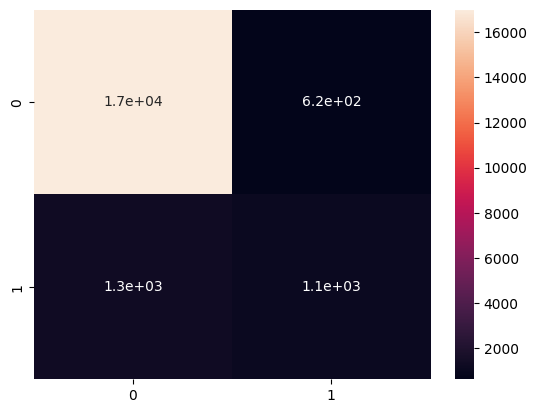

In [27]:
sns.heatmap(confusion_matrix(gpredict,y_test),annot=True);

In [28]:
print(classification_report(gpredict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17623
           1       0.64      0.46      0.53      2377

    accuracy                           0.90     20000
   macro avg       0.78      0.71      0.74     20000
weighted avg       0.89      0.90      0.90     20000



In [29]:
b.fit(x,y)

BernoulliNB()

In [30]:
bpredict=b.predict(x_test)

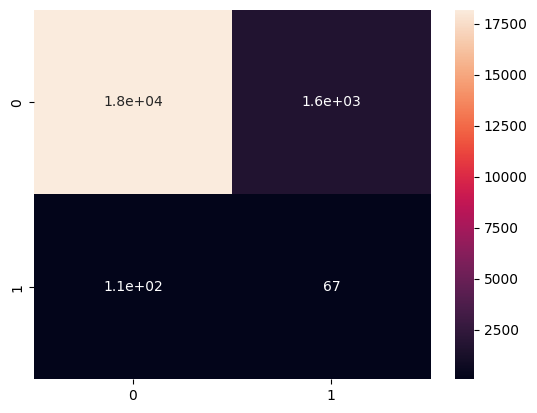

In [31]:
sns.heatmap(confusion_matrix(bpredict,y_test),annot=True);

In [32]:
print(classification_report(bpredict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     19823
           1       0.04      0.38      0.07       177

    accuracy                           0.91     20000
   macro avg       0.52      0.65      0.51     20000
weighted avg       0.99      0.91      0.95     20000



The Logistic Regression model appears to be the best performing overall.

### Save Model

In [33]:
model=l.fit(x, y)

In [34]:
import pickle

In [35]:
pickle.dump(model,open('diabetes.pkl','wb'))